In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import *
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
RANDOM_STATUS = 42

In [3]:
iris = load_iris()
X = iris["data"]
Y = iris["target"]
s = StandardScaler()
s.fit(X)
X = s.fit_transform(X)

In [4]:
def NB_model(model:GaussianNB,name):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATUS)
    model.fit(x_train,y_train)
    y_real = y_test
    y_pred = model.predict(x_test)
    print(f"MODEL {name}'s score: {model.score(x_test,y_test)}")
    print(f"F1: {f1_score(y_real,y_pred,average='macro')}")
    print("report: ")
    print(classification_report(y_real,y_pred))
    cf_mx = confusion_matrix(y_test,y_pred)
    plt.matshow(cf_mx)

    for x in range(len(cf_mx)):
        for y in range(len(cf_mx)):
            info = cf_mx[y,x]
            plt.text(x,y,info,verticalalignment='center',horizontalalignment='center')

    plt.xticks(range(len(iris["target_names"])),iris["target_names"])
    plt.yticks(range(len(iris["target_names"])),iris["target_names"])
    plt.title(f"MODEL {name}")
    plt.colorbar()
    plt.show()

MODEL GaussianNB's score: 0.9777777777777777
F1: 0.974320987654321
report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



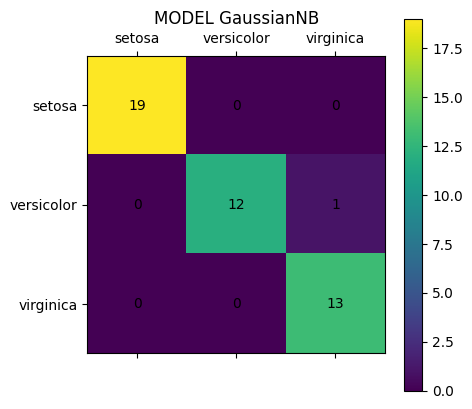

In [5]:
gaussianNB = GaussianNB(priors=None)
NB_model(gaussianNB,"GaussianNB")

高斯贝叶斯只有一个分类错误，不对其调参。

MODEL BernoulliNB's score: 0.7777777777777778
F1: 0.7167755991285403
report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.80      0.31      0.44        13
           2       0.57      0.92      0.71        13

    accuracy                           0.78        45
   macro avg       0.79      0.74      0.72        45
weighted avg       0.82      0.78      0.75        45



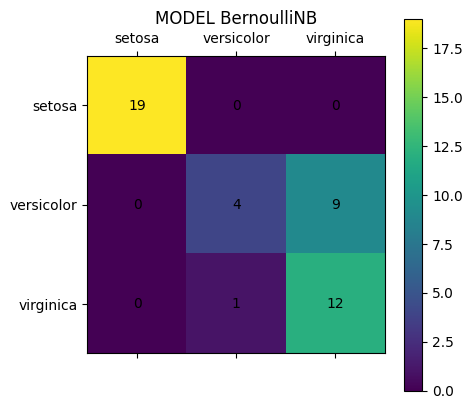

In [6]:
bernoulliNB = BernoulliNB()
NB_model(bernoulliNB,"BernoulliNB")

In [7]:
bernoulliNB = BernoulliNB()
param = {'alpha':np.linspace(0.0001,2,50),'fit_prior':[True,False],"binarize":np.linspace(0.0001,2,50)}
gridCV = GridSearchCV(bernoulliNB,param_grid=param,cv=5)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATUS)

gridCV.fit(x_train,y_train)
bestNB = gridCV.best_estimator_
print(gridCV.score(x_test,y_test))
print(gridCV.best_params_)

0.8222222222222222
{'alpha': 0.0001, 'binarize': 0.40824285714285713, 'fit_prior': True}


通过gridcv找到了最佳的参数

MODEL Best of BernoulliNB's score: 0.8222222222222222
F1: 0.8248015873015874
report: 
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.65      0.85      0.73        13
           2       0.87      1.00      0.93        13

    accuracy                           0.82        45
   macro avg       0.84      0.84      0.82        45
weighted avg       0.86      0.82      0.82        45



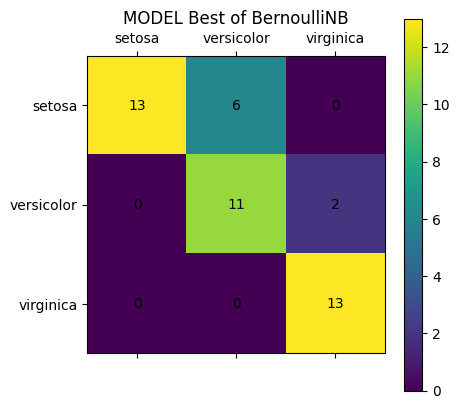

In [8]:
NB_model(bestNB,'Best of BernoulliNB')

In [9]:
df = pd.DataFrame(data=X,columns=iris["feature_names"])
df["label"] = Y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


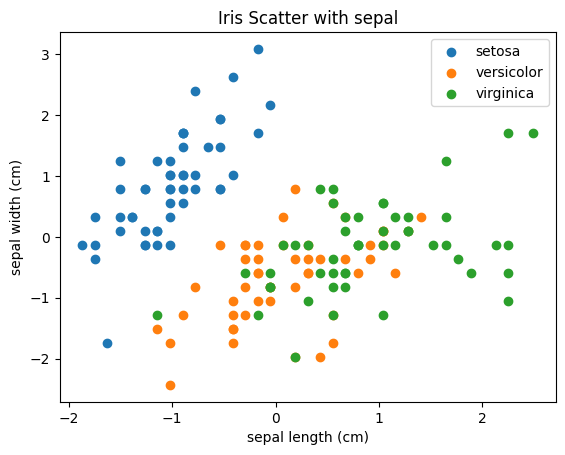

In [10]:
for i in range(3):
    plt.scatter(df[df["label"] == i]["sepal length (cm)"],df[df["label"] == i]["sepal width (cm)"],label=iris["target_names"][i])
plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Iris Scatter with sepal")
plt.show()

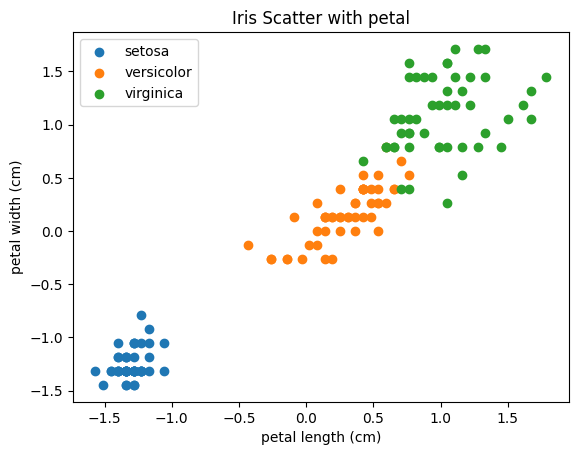

In [11]:
for i in range(3):
    plt.scatter(df[df["label"] == i]["petal length (cm)"],df[df["label"] == i]["petal width (cm)"],label=iris["target_names"][i])
plt.legend()
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("Iris Scatter with petal")
plt.show()